# EDA Report

In this file, we make a EDA Report Jupyter Notebook using Python Kernel in a venv what get data of PosgreSQL table previously loaded called **raw_applicant** of **etl_workshop_first** database hosted in a **Local server** or in **AWS RDS server** depending on the credendials filename assignment (_credentials.ini_ filename for local or *aws_credentials.ini* filename for cloud) to clean and transform it in data that can bring us value to load again a PosgreSQL table called **applicant**.

Later, we will connect **Looker Studio** with **applicant**'s PostgreSQL table to communicate the objetives specified:

- Hires by technology.

- Hires by year.

- Hires by seniority.

- Hires by country over years (USA, Brazil, Colombia, and Ecuador only).

---
## Install requirement libraries

In [ ]:
pip install -r ../code/config/requirements.txt

---
## Process

Import libraries:

In [2]:
import importlib.util
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

spec = importlib.util.spec_from_file_location("connect_database", f"../code/connect_database.py")
connect_database = importlib.util.module_from_spec(spec)
spec.loader.exec_module(connect_database)

### Let's know the table
Getting data:

Let's create the connection with PostgreSQL and the dataframe

In [3]:
connection = connect_database.ConnectionPostgres()
records_table = connection.get_module_records('RawApplicant')
raw_data_dataframe = pd.DataFrame(records_table)

Let's find out how many records and columns it has:

In [4]:

raw_data_dataframe.shape

(50000, 12)

We had 11 columns when we loaded the data from the CSV file to SQL table, so we have 1 column added. Let's see what they are:

In [5]:
raw_data_dataframe.columns

Index(['_sa_instance_state', 'email', 'id', 'country', 'seniority',
       'code_challenge_score', 'applicant_date', 'first_name', 'last_name',
       'experience_year', 'technology', 'technical_interview_score'],
      dtype='object')

There is a column '*_sa_instance_state*' unknown. Inquiring is a record that adds SQLAlchemy to store the status of the object instance. We will confirm this by looking at some of its records to remove the column if so:

In [6]:
raw_data_dataframe['_sa_instance_state'].value_counts()

_sa_instance_state
<sqlalchemy.orm.state.InstanceState object at 0x000001D4AC8A7580>    1
<sqlalchemy.orm.state.InstanceState object at 0x000001D4B1835480>    1
<sqlalchemy.orm.state.InstanceState object at 0x000001D4B1834C40>    1
<sqlalchemy.orm.state.InstanceState object at 0x000001D4B1834CA0>    1
<sqlalchemy.orm.state.InstanceState object at 0x000001D4B1834D00>    1
                                                                    ..
<sqlalchemy.orm.state.InstanceState object at 0x000001D4B088CC40>    1
<sqlalchemy.orm.state.InstanceState object at 0x000001D4B088CCA0>    1
<sqlalchemy.orm.state.InstanceState object at 0x000001D4B088CD00>    1
<sqlalchemy.orm.state.InstanceState object at 0x000001D4B088CD60>    1
<sqlalchemy.orm.state.InstanceState object at 0x000001D4B37E9060>    1
Name: count, Length: 50000, dtype: int64

This confirms my inquiry and we will delete it:

In [7]:
raw_data_dataframe.drop(columns=['_sa_instance_state'], inplace=True)

Let's continue with exploration.

In [8]:
raw_data_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   email                      50000 non-null  object
 1   id                         50000 non-null  int64 
 2   country                    50000 non-null  object
 3   seniority                  50000 non-null  object
 4   code_challenge_score       50000 non-null  int64 
 5   applicant_date             50000 non-null  object
 6   first_name                 50000 non-null  object
 7   last_name                  50000 non-null  object
 8   experience_year            50000 non-null  int64 
 9   technology                 50000 non-null  object
 10  technical_interview_score  50000 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 4.2+ MB


Describing the table:

In [9]:
raw_data_dataframe.describe()

,id,code_challenge_score,experience_year,technical_interview_score
count,50000.000000,50000.000000,50000.000000,50000.000000
mean,25000.500000,4.996400,15.286980,5.003880
std,14433.901067,3.166896,8.830652,3.165082
min,1.000000,0.000000,0.000000,0.000000
25%,12500.750000,2.000000,8.000000,2.000000
50%,25000.500000,5.000000,15.000000,5.000000
75%,37500.250000,8.000000,23.000000,8.000000
max,50000.000000,10.000000,30.000000,10.000000


Excluding the **id** column, three columns are read as numeric. **code_challenge_score** and **technical_interview_score** have data between 0 and 10. The mean score in **code_challenge_score** column is a little lower than mean score in **technical_interview_ score** column. In the column called **experience_year**, standard deviation is quite high, indicating signicant variability in the work experience of candidates.

Checking for NaN values that we couldn't see

In [10]:
raw_data_dataframe.isna().sum()

email                        0
id                           0
country                      0
seniority                    0
code_challenge_score         0
applicant_date               0
first_name                   0
last_name                    0
experience_year              0
technology                   0
technical_interview_score    0
dtype: int64

Checking values for each column of table

In [11]:
for column in raw_data_dataframe.columns:
    print(raw_data_dataframe[column].sort_values().value_counts(ascending=False))
    print("-"*10)

email
marianne31@yahoo.com                3
fern70@gmail.com                    3
hildegard_prohaska@yahoo.com        2
macey77@yahoo.com                   2
octavia58@gmail.com                 2
                                   ..
esperanza83@gmail.com               1
esperanza85@gmail.com               1
esperanza9@hotmail.com              1
esperanza_balistreri13@gmail.com    1
zula_weissnat@hotmail.com           1
Name: count, Length: 49833, dtype: int64
----------
id
1        1
33351    1
33329    1
33330    1
33331    1
        ..
16669    1
16670    1
16671    1
16672    1
50000    1
Name: count, Length: 50000, dtype: int64
----------
country
Malawi                          242
Spain                           238
Cook Islands                    234
Svalbard & Jan Mayen Islands    234
Netherlands Antilles            234
                               ... 
Libyan Arab Jamahiriya          172
Cape Verde                      172
Isle of Man                     170
Tanzania        

applicant_date
2020-07-07    50
2018-12-06    48
2019-09-01    47
2020-10-12    47
2018-09-23    47
              ..
2022-01-05    17
2019-08-31    16
2020-05-03    16
2019-03-27    15
2022-01-08    14
Name: count, Length: 1646, dtype: int64
----------
first_name
Sarai        33
Elyse        32
Anabel       31
Eva          31
Nayeli       30
             ..
Jaydon        6
Willie        6
Antonetta     5
Paul          5
Gudrun        5
Name: count, Length: 3007, dtype: int64
----------
last_name
Murazik      138
Nitzsche     134
Harvey       133
Lang         133
Metz         133
            ... 
Kutch         83
Howe          82
White         79
McClure       78
Bechtelar     76
Name: count, Length: 474, dtype: int64
----------
experience_year
24    1720
7     1699
16    1692
5     1692
29    1677
2     1676
28    1676
23    1675
22    1671
30    1665
4     1664
9     1662
25    1660
26    1659
3     1637
11    1632
10    1623
18    1621
19    1617
21    1614
15    1612
8     1612
1   

With this process, we see several things:

1. Two score columns (_code_challenge_score and technical_interview_score_) have values among 0 and 10, where 10 is the maximum qualitification.

2. There are several tecnologies that could be agrouped together and provide us with better insights.

3. There are emails that repeat among all records, which could be due to their application as candidates in different areas. So, we will focus in this part.

4. We consider it important to extract the year and month in order to treat them in a better way in the dashboard.

#### 1. Code_challenge_score and technical_interview_score & is hire?

In this section, let's create a new column on the candidates are hire or not. As is the requirement, a candidate is HIRED when she/he has both scores greater than or equal to 7.

Let's look at similarities between the columns, _technical_interview_score_ and _code_challenge_score_:

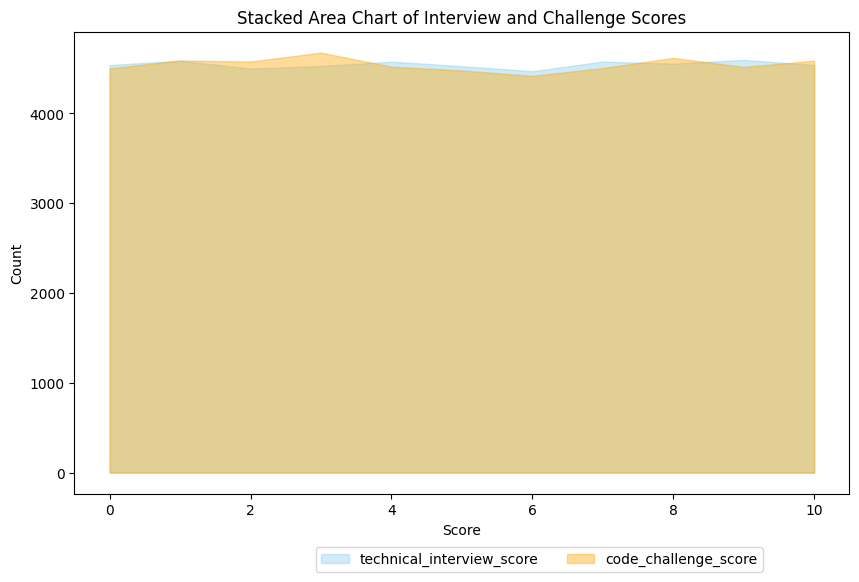

In [12]:
counts_technical = raw_data_dataframe['technical_interview_score'].value_counts().sort_index()
counts_code = raw_data_dataframe['code_challenge_score'].value_counts().sort_index()
fig, ax = plt.subplots(figsize=(10, 6))

plt.fill_between(counts_technical.index, counts_technical, color='skyblue', alpha=0.4, label='technical_interview_score')
plt.fill_between(counts_code.index, counts_code, color='orange', alpha=0.4, label='code_challenge_score')

plt.xlabel('Score')
plt.ylabel('Count')
plt.title('Stacked Area Chart of Interview and Challenge Scores')
ax.legend(loc='upper center', bbox_to_anchor=(0.6, -0.1), ncol=3)
plt.show()

Let's create the column:

In [13]:
raw_data_dataframe['is_hire'] = np.where((raw_data_dataframe['code_challenge_score'] >= 7) & (raw_data_dataframe['technical_interview_score'] >= 7), 1, 0)

Let's see how many are candidates hired.

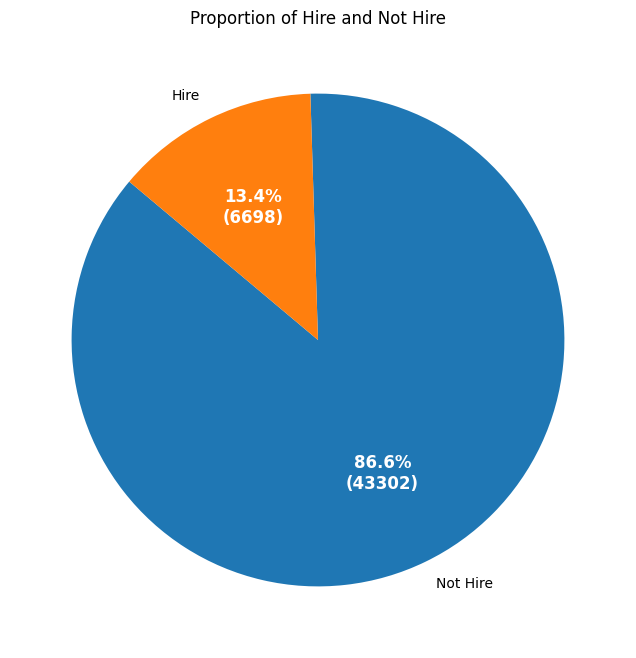

In [14]:
hire_counts = raw_data_dataframe['is_hire'].value_counts()
 
def func(pct, allvals):
    """Define a function to format the tooltip with percentage and count"""
    absolute = int(round(pct/100.*sum(allvals)))
    return f'{pct:.1f}%\n({absolute})'

plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(hire_counts, labels=['Not Hire', 'Hire'], autopct=lambda pct: func(pct, hire_counts), textprops={"color": "black"}, startangle=140)
plt.setp(autotexts, size=12, weight="bold", color="white")

plt.title('Proportion of Hire and Not Hire')
plt.show()

#### 2. Grouping tecnologies to better insights.

In this section, let's find out common tecnologies in a generalize way and store them in the dataframe.

In [15]:
raw_data_dataframe['technology'].sort_values().unique()

array(['Adobe Experience Manager',
       'Business Analytics / Project Management', 'Business Intelligence',
       'Client Success', 'Data Engineer', 'Database Administration',
       'Design', 'DevOps', 'Development - Backend',
       'Development - CMS Backend', 'Development - CMS Frontend',
       'Development - Frontend', 'Development - FullStack',
       'Game Development', 'Mulesoft', 'QA Automation', 'QA Manual',
       'Sales', 'Salesforce', 'Security', 'Security Compliance',
       'Social Media Community Management', 'System Administration',
       'Technical Writing'], dtype=object)

In [16]:
len(raw_data_dataframe['technology'].sort_values().unique())

24

We have 24 different technologies, so I'm going to group them into the following 8 categories:

- **Software Development**:

    - _Development - Backend_
    - _Development - CMS Backend_
    - _Development - CMS Frontend_
    - _Development - Frontend_
    - _Development - FullStack_
    - _Game Development_

- **Data & Analytics**

    - _Business Intelligence_
    - _Business Analytics / Project Management_
    - _Data Engineer_

- **IT Infrastructure & Operations**:

    - _Database Administration_
    - _System Administration_
    - _DevOps_

- **Quality Assurance**

    - _QA Manual_
    - _QA Automation_

- **Security**

    - _Security_
    - _Security Complilance_
    
- **Customer Relationship and Success**

    - _Client Success_
    - _Sales_
    - _Social Media Community Management_
    - _Salesforce_
    
- **Content Management and Design**

    - _Technical Writing_
    - _Design_
    - _Adobe Experience Manager_
    
- **Integration and Connectivity**

    - _Mulesoft_

Let's create a dict to assign each new category to current technology

In [17]:
technology_categories = {
    'Development - Frontend': 'Software Development',
    'Development - Backend': 'Software Development',
    'Development - FullStack': 'Software Development',
    'Development - CMS Backend': 'Software Development',
    'Development - CMS Frontend': 'Software Development',
    'Game Development': 'Software Development',
    'Business Intelligence': 'Data and Analytics',
    'Business Analytics / Project Management': 'Data and Analytics',
    'Data Engineer': 'Data and Analytics',
    'Database Administration': 'IT Infrastructure and Operations',
    'System Administration': 'IT Infrastructure and Operations',
    'DevOps': 'IT Infrastructure and Operations',
    'QA Manual': 'Quality Assurance',
    'QA Automation': 'Quality Assurance',
    'Security': 'Security',
    'Security Compliance': 'Security',
    'Client Success': 'Customer Relationship and Success',
    'Sales': 'Customer Relationship and Success',
    'Salesforce': 'Customer Relationship and Success',
    'Social Media Community Management': 'Customer Relationship and Success',
    'Technical Writing': 'Content Management and Design',
    'Design': 'Content Management and Design',
    'Adobe Experience Manager': 'Content Management and Design',
    'Mulesoft': 'Integration and Connectivity'
}
raw_data_dataframe['technology_category'] = raw_data_dataframe['technology'].map(technology_categories)

In [18]:
raw_data_dataframe['technology_category'].sort_values().value_counts()

technology_category
Software Development                 13447
IT Infrastructure and Operations      7755
Customer Relationship and Success     7719
Data and Analytics                    5763
Content Management and Design         5761
Quality Assurance                     3794
Security                              3788
Integration and Connectivity          1973
Name: count, dtype: int64

In [19]:
raw_data_dataframe['technology_category'].sort_values().value_counts().sum()

50000

From 24 to 8 categories with an application confirmation in 50.000 of 50.000 rows.

Let's see in a best way:

In [20]:
count_technology_name = dict(raw_data_dataframe['technology'].value_counts())
technology_name = list(raw_data_dataframe['technology'].unique())

technology_category_name = list(raw_data_dataframe['technology_category'].sort_values().unique())

values_list = []
for technology in technology_name:
    row_list = []
    for category in technology_category_name:
        row_list.append(raw_data_dataframe[(raw_data_dataframe['technology'] == technology) & (raw_data_dataframe['technology_category'] == category)].shape[0])
    values_list.append(row_list)
values_list = np.array(values_list)
column_sums = np.sum(values_list, axis=0)

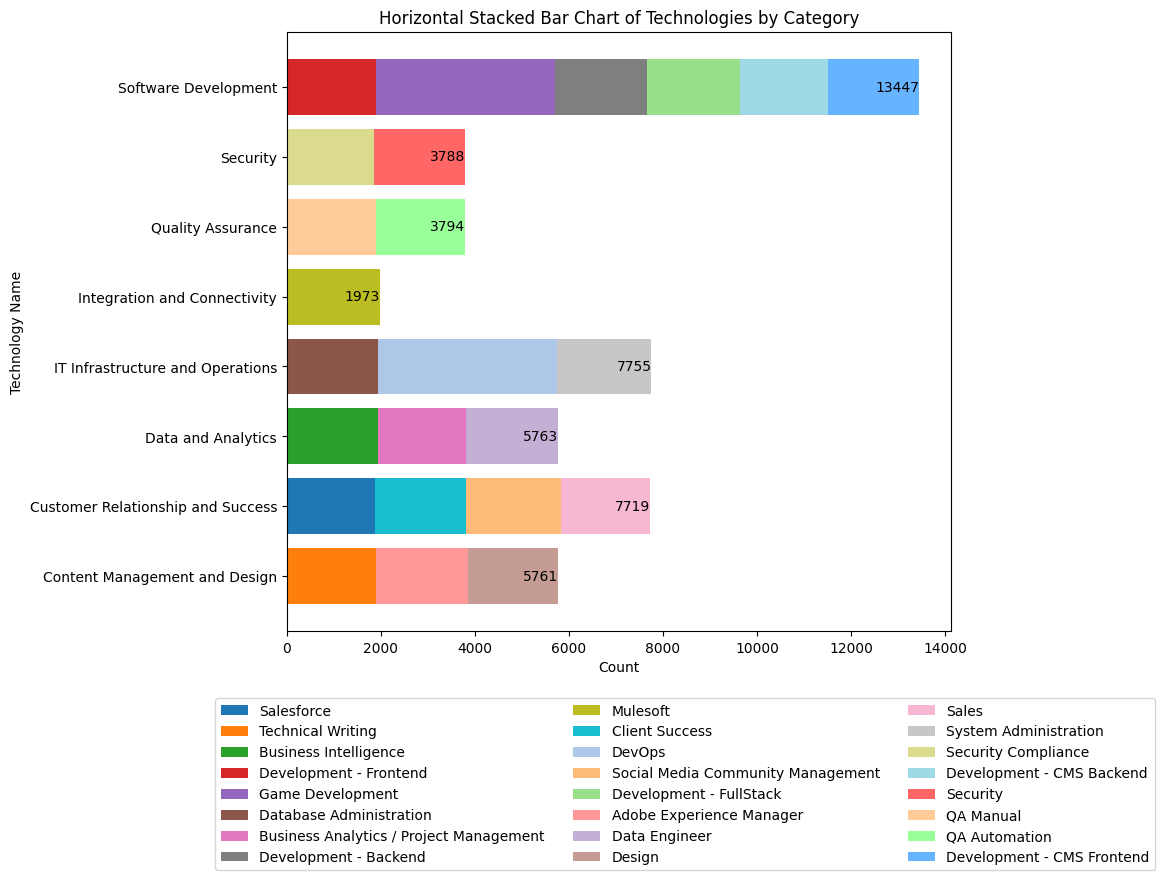

In [21]:
fig, ax = plt.subplots(figsize=(11, 9))
custom_colors = [
    '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
    '#bcbd22', '#17becf', '#aec7e8', '#ffbb78', '#98df8a', '#ff9896', '#c5b0d5', '#c49c94',
    '#f7b6d2', '#c7c7c7', '#dbdb8d', '#9edae5', '#ff6666', '#ffcc99', '#99ff99', '#66b3ff']

for i in range(len(values_list)):
    ax.barh(technology_category_name, values_list[i], label=technology_name[i], left=np.sum(values_list[:i], axis=0), color=custom_colors[i % len(custom_colors)])
for i in range(len(column_sums)):
    ax.annotate(str(column_sums[i]), xy=(column_sums[i], i), ha='right', va='center')

plt.ylabel('Technology Name')
plt.xlabel('Count') 
plt.title('Horizontal Stacked Bar Chart of Technologies by Category')
ax.legend(loc='upper center', bbox_to_anchor=(0.6, -0.1), ncol=3)
plt.tight_layout()
plt.show()

In [22]:
raw_data_dataframe.columns

Index(['email', 'id', 'country', 'seniority', 'code_challenge_score',
       'applicant_date', 'first_name', 'last_name', 'experience_year',
       'technology', 'technical_interview_score', 'is_hire',
       'technology_category'],
      dtype='object')

#### 3. Focus in emails repeated. Is there a reason?

In this section, let's if there is a rationale (knowing its random origin) and if it can give us an insight.

In [23]:
grouped_df = raw_data_dataframe.groupby('email').agg({'technology_category': list, 'technology': list, 'technical_interview_score': list, 'code_challenge_score': list}).reset_index()

grouped_df['email_count'] = raw_data_dataframe.groupby('email').size().values
grouped_df = grouped_df[grouped_df['email_count'] > 1]

Above, we performed a grouping by **email** to know the number of applications, technologies, and the average of the code challenge and technical interview scores. Later, we count the occurrences of each email and store it in a new column called **email_count**.

In [24]:
grouped_df.shape

(165, 6)

In [25]:
grouped_df.head()

,email,technology_category,technology,technical_interview_score,code_challenge_score,email_count
93,abbigail94@yahoo.com,"[IT Infrastructure and Operations, Customer Re...","[DevOps, Client Success]","[2, 8]","[6, 5]",2
420,addison_bode@hotmail.com,"[Software Development, IT Infrastructure and O...","[Development - Backend, Database Administration]","[2, 3]","[7, 10]",2
1137,alberta95@gmail.com,"[Content Management and Design, Customer Relat...","[Adobe Experience Manager, Salesforce]","[2, 1]","[7, 9]",2
1163,alberto11@yahoo.com,"[Customer Relationship and Success, Data and A...","[Sales, Business Intelligence]","[4, 9]","[0, 2]",2
1286,alejandra17@hotmail.com,"[Software Development, Software Development]","[Development - FullStack, Development - Backend]","[9, 10]","[2, 6]",2


We found 165 records in which emails have been repeated at least 2 times.

Now, let's find out how many candidates in this situation changed technology in specified at least 1 time. This will give us an idea of the percentage to change of technology among applications as candidate.

In [26]:
def has_unique_technologies(technology_list):
    """Check if there are distinct repeated technologies"""
    return len(set(technology_list)) == len(technology_list)

grouped_df['has_unique_technologies'] = grouped_df['technology'].apply(has_unique_technologies)

In [27]:
grouped_df['has_unique_technologies'].value_counts()

has_unique_technologies
True     159
False      6
Name: count, dtype: int64

Although the data has random origin, it's interesting 159 (96.36%) of 165 had changed technology by the time they applied.

#### 4. Just a matter of time
Let's go deeper on applicant_date column.

In [28]:
raw_data_dataframe['applicant_date'] = pd.to_datetime(raw_data_dataframe['applicant_date'], format='mixed')
raw_data_dataframe['applicant_year'] = raw_data_dataframe['applicant_date'].dt.year
raw_data_dataframe['applicant_month_name'] = raw_data_dataframe['applicant_date'].dt.month_name()
raw_data_dataframe['applicant_month'] = raw_data_dataframe['applicant_date'].dt.month

In [29]:
raw_data_dataframe['applicant_year'].value_counts()

applicant_year
2020    11237
2018    11061
2021    11051
2019    11009
2022     5642
Name: count, dtype: int64

In [30]:
raw_data_dataframe['applicant_month_name'].value_counts()

applicant_month_name
May          4752
March        4649
January      4618
June         4566
April        4542
February     4285
July         3996
October      3813
August       3783
December     3777
September    3610
November     3609
Name: count, dtype: int64

### Let's load this dataframe to applicant table in PostgreSQL

In [31]:
raw_data_dataframe.to_sql('applicant', connection.engine, if_exists='replace', index=False)
connection.log('Data loaded to {}: {} rows - {} columns.' .format('applicant', raw_data_dataframe.shape[0], raw_data_dataframe.shape[1]))

In [32]:
connection.close_connection()

### Conclusion

Some insights about this exploration and conclusions:

- Column removed due to its assigning automately by SQLAlchemy:

    - _sa_instance_state

- 10 columns to 16 columns loaded in **applicant** table in the database.

- 24 technologies were grouped into 8.

- 165 candidates have submitted a minimum of two applications.

- 13.4% of candidates are will be hired.

Data loaded:

![Applicant data](https://gist.github.com/assets/92474551/13086343-0d5b-4829-84c6-05d1c57d00b9)